<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_id           1000 non-null   object 
 1   title             1000 non-null   object 
 2   description       1000 non-null   object 
 3   priority          1000 non-null   object 
 4   status            1000 non-null   object 
 5   assignee          1000 non-null   object 
 6   project           1000 non-null   object 
 7   created_date      1000 non-null   object 
 8   due_date          1000 non-null   object 
 9   completed_date    205 non-null    object 
 10  tags              1000 non-null   object 
 11  estimated_hours   1000 non-null   int64  
 12  actual_hours      205 non-null    float64
 13  dependencies      189 non-null    object 
 14  progress_percent  1000 non-null   int64  
 15  comments_count    1000 non-null   int64  
 16  last_updated      1000 non-null   object 
d

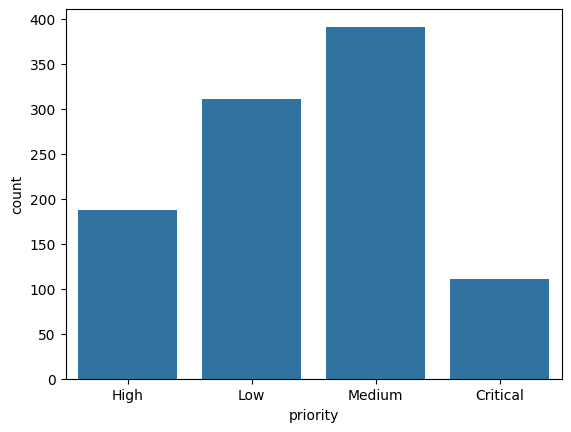

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\AI_Task_Management\Data\dataset.csv")
print(df.info())
print(df.describe())

sns.countplot(x="priority", data=df)
plt.show()


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# 1️⃣ Load dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\AI_Task_Management\Data\dataset.csv")
print("Columns:", df.columns.tolist())

# 2️⃣ Download necessary NLTK resources (fix for punkt_tab error)
nltk.download('punkt')
nltk.download('punkt_tab')  # 👈 required in Python 3.12+
nltk.download('stopwords')
nltk.download('wordnet')

# 3️⃣ Combine Title + Description
df["text"] = df[["title", "description"]].fillna("").astype(str).agg(" ".join, axis=1)

# 4️⃣ Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(raw):
    text = str(raw).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

# 5️⃣ Apply
df["clean_text"] = df["text"].apply(clean_text)

# 6️⃣ Check few rows
print(df[["title", "clean_text"]].head())

# 7️⃣ Save cleaned data
df.to_csv("tasks_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as tasks_cleaned.csv")


Columns: ['task_id', 'title', 'description', 'priority', 'status', 'assignee', 'project', 'created_date', 'due_date', 'completed_date', 'tags', 'estimated_hours', 'actual_hours', 'dependencies', 'progress_percent', 'comments_count', 'last_updated']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                          title  \
0        Annotate training data   
1         Create task scheduler   
2     Integrate payment gateway   
3  Fix production bug - payment   
4       Deploy model to staging   

                                          clean_text  
0           annotate training data data pipeline etl  
1       create task scheduler documentation handover  
2          integrate payment gateway testing qa task  
3  fix production bug payment frontend design int...  
4     deploy model staging model training evaluation  
✅ Cleaned dataset saved as tasks_cleaned.csv


In [9]:
# ============================================================
# 🔹 Week 2 - Step 1: Feature Extraction using TF-IDF
# ============================================================

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Load the cleaned dataset
df = pd.read_csv("tasks_cleaned.csv")
print("✅ Dataset loaded successfully!")
print("Columns available:", df.columns.tolist())

# 2️⃣ Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=1000,   # Limit to 1000 top words (optional for performance)
    ngram_range=(1,2),   # Use unigrams + bigrams (optional but helps context)
    stop_words='english' # Automatically remove English stopwords
)

# 3️⃣ Fit and transform the cleaned text
X = vectorizer.fit_transform(df["clean_text"])

# 4️⃣ Select your target variable (Priority or Label)
# 👇 Make sure 'priority' column exists in your CSV
y = df["priority"]

# 5️⃣ Print useful info to verify
print("\n✅ TF-IDF feature extraction complete!")
print("Shape of TF-IDF matrix:", X.shape)
print("Number of features (unique words):", len(vectorizer.get_feature_names_out()))
print("Sample feature names:", vectorizer.get_feature_names_out()[:15])

# (Optional) Check first few TF-IDF values as a DataFrame (small datasets only)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\n🔹 Sample TF-IDF matrix preview:")
print(tfidf_df.head())


✅ Dataset loaded successfully!
Columns available: ['task_id', 'title', 'description', 'priority', 'status', 'assignee', 'project', 'created_date', 'due_date', 'completed_date', 'tags', 'estimated_hours', 'actual_hours', 'dependencies', 'progress_percent', 'comments_count', 'last_updated', 'text', 'clean_text']

✅ TF-IDF feature extraction complete!
Shape of TF-IDF matrix: (1000, 465)
Number of features (unique words): 465
Sample feature names: ['access' 'access backend' 'access customer' 'access data'
 'access detailed' 'access devops' 'access documentation'
 'access frontend' 'access model' 'access performance' 'access testing'
 'accuracy' 'accuracy backend' 'accuracy customer' 'accuracy data']

🔹 Sample TF-IDF matrix preview:
   access  access backend  access customer  access data  access detailed  \
0     0.0             0.0              0.0          0.0              0.0   
1     0.0             0.0              0.0          0.0              0.0   
2     0.0             0.0         

In [10]:
# ============================================================
# 🔹 Week 2 - Step 2: Task Classification (Naive Bayes & SVM)
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1️⃣ Split the dataset into training and testing sets
# Use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split done:")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ------------------------------------------------------------
# 2️⃣ Train Naive Bayes Classifier
# ------------------------------------------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# ------------------------------------------------------------
# 3️⃣ Train Support Vector Machine (SVM) Classifier
# ------------------------------------------------------------
svm_model = SVC(kernel='linear')  # 'linear' works well for text data
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# ------------------------------------------------------------
# 4️⃣ Evaluate both models
# ------------------------------------------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Model Evaluation:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 3))
    print("Recall:", round(recall_score(y_true, y_pred, average='weighted'), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred, average='weighted'), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("SVM", y_test, y_pred_svm)

# ------------------------------------------------------------
# 5️⃣ Save the better model for later (optional)
# ------------------------------------------------------------
import joblib

joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
print("\n✅ Models saved as 'naive_bayes_model.pkl' and 'svm_model.pkl'")


✅ Data split done:
Training samples: 800
Testing samples: 200

📊 Naive Bayes Model Evaluation:
Accuracy: 0.3
Precision: 0.192
Recall: 0.3
F1 Score: 0.234

Classification Report:
               precision    recall  f1-score   support

    Critical       0.00      0.00      0.00        28
        High       0.00      0.00      0.00        42
         Low       0.21      0.30      0.25        56
      Medium       0.36      0.58      0.45        74

    accuracy                           0.30       200
   macro avg       0.14      0.22      0.17       200
weighted avg       0.19      0.30      0.23       200


📊 SVM Model Evaluation:
Accuracy: 0.335
Precision: 0.209
Recall: 0.335
F1 Score: 0.254

Classification Report:
               precision    recall  f1-score   support

    Critical       0.00      0.00      0.00        28
        High       0.00      0.00      0.00        42
         Low       0.25      0.29      0.27        56
      Medium       0.38      0.69      0.49        74

 

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag